# ~ Telecom Churn Group Case Study ~
### Submitted By -
### 1. Sudhanshu Singh
### 2. Sweta Singh

### In this case study, we will analyse customer data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
### In the dataset, we will work over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [1]:
# Importing library
import os

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading data file
customer_dataframe = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Getting dimensions
print("SHAPE")
print(customer_dataframe.shape)

SHAPE
(99999, 226)


In [4]:
# Describing data
customer_dataframe.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
# Getting data types
customer_dataframe.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [6]:
# Getting head of data set
customer_dataframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
# Getting column list
print(customer_dataframe.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


In [8]:
# Checking if any duplicate mobile number is present in the data
print(any(customer_dataframe['mobile_number'].duplicated()))

False


## Data Preperation & Data Cleaning

In [9]:
# All mobile numbers are unique and there is no duplicate data
# Now let us check all date and non date columns and convert them to appropriate data type

In [10]:
# Date Columns
date_columns = []
for column in customer_dataframe.columns:
    if 'date' in column:
        date_columns.append(column)

print(customer_dataframe[date_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
date_of_last_rech_6         98392 non-null object
date_of_last_rech_7         98232 non-null object
date_of_last_rech_8         96377 non-null object
date_of_last_rech_9         95239 non-null object
date_of_last_rech_data_6    25153 non-null object
date_of_last_rech_data_7    25571 non-null object
date_of_last_rech_data_8    26339 non-null object
date_of_last_rech_data_9    25922 non-null object
dtypes: object(12)
memory usage: 9.2+ MB
None


In [11]:
# Converting all date time object to datetime format
for column in date_columns:
    customer_dataframe[column] = pd.to_datetime(customer_dataframe[column])
    
print(customer_dataframe[date_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null datetime64[ns]
last_date_of_month_7        99398 non-null datetime64[ns]
last_date_of_month_8        98899 non-null datetime64[ns]
last_date_of_month_9        98340 non-null datetime64[ns]
date_of_last_rech_6         98392 non-null datetime64[ns]
date_of_last_rech_7         98232 non-null datetime64[ns]
date_of_last_rech_8         96377 non-null datetime64[ns]
date_of_last_rech_9         95239 non-null datetime64[ns]
date_of_last_rech_data_6    25153 non-null datetime64[ns]
date_of_last_rech_data_7    25571 non-null datetime64[ns]
date_of_last_rech_data_8    26339 non-null datetime64[ns]
date_of_last_rech_data_9    25922 non-null datetime64[ns]
dtypes: datetime64[ns](12)
memory usage: 9.2 MB
None


In [12]:
# Lets look at columns which do not have monthly data
columns_containing_months = (
                             customer_dataframe.columns.str.contains('_6') |
                             customer_dataframe.columns.str.contains('_7') |
                             customer_dataframe.columns.str.contains('_8') |
                             customer_dataframe.columns.str.contains('_9')
                            )
            
other_columns = customer_dataframe.columns[~columns_containing_months]
print(customer_dataframe[other_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 10 columns):
mobile_number     99999 non-null int64
circle_id         99999 non-null int64
loc_og_t2o_mou    98981 non-null float64
std_og_t2o_mou    98981 non-null float64
loc_ic_t2o_mou    98981 non-null float64
aon               99999 non-null int64
aug_vbc_3g        99999 non-null float64
jul_vbc_3g        99999 non-null float64
jun_vbc_3g        99999 non-null float64
sep_vbc_3g        99999 non-null float64
dtypes: float64(7), int64(3)
memory usage: 7.6 MB
None


In [13]:
# Here we can see that last 4 columns also have monthly data, so we will rename them as other monthly columns
customer_dataframe.rename(columns = {'jun_vbc_3g': 'vbc_3g_6',
                                     'jul_vbc_3g': 'vbc_3g_7',
                                     'aug_vbc_3g': 'vbc_3g_8',
                                     'sep_vbc_3g': 'vbc_3g_9'
                                    }, inplace = True)

In [14]:
# Lets look at columns which do not have monthly data
columns_containing_months = (
                             customer_dataframe.columns.str.contains('_6') |
                             customer_dataframe.columns.str.contains('_7') |
                             customer_dataframe.columns.str.contains('_8') |
                             customer_dataframe.columns.str.contains('_9')
                            )
            
other_columns = customer_dataframe.columns[~columns_containing_months]
print(customer_dataframe[other_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
mobile_number     99999 non-null int64
circle_id         99999 non-null int64
loc_og_t2o_mou    98981 non-null float64
std_og_t2o_mou    98981 non-null float64
loc_ic_t2o_mou    98981 non-null float64
aon               99999 non-null int64
dtypes: float64(3), int64(3)
memory usage: 4.6 MB
None


In [15]:
# Getting data types
# To check if any object value is remaining
customer_dataframe.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null datetime64[ns]
last_date_of_month_7        99398 non-null datetime64[ns]
last_date_of_month_8        98899 non-null datetime64[ns]
last_date_of_month_9        98340 non-null datetime64[ns]
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64

### Filteirng high value customers

In [16]:
# Checking if "total_rech_amt_6" and "total_rech_amt_7" have any null values
print(customer_dataframe.total_rech_amt_6.isnull().sum())
print(customer_dataframe.total_rech_amt_7.isnull().sum())

# Checking if "av_rech_amt_data_6" and "av_rech_amt_data_7" have any null values
print(customer_dataframe.av_rech_amt_data_6.isnull().sum())
print(customer_dataframe.av_rech_amt_data_7.isnull().sum())

0
0
74846
74428


In [17]:
# Now we will impute values in "av_rech_amt_data_6" and "av_rech_amt_data_7"
print((customer_dataframe[["av_rech_amt_data_6", "av_rech_amt_data_7"]].describe()))

       av_rech_amt_data_6  av_rech_amt_data_7
count        25153.000000        25571.000000
mean           192.600982          200.981292
std            192.646318          196.791224
min              1.000000            0.500000
25%             82.000000           92.000000
50%            154.000000          154.000000
75%            252.000000          252.000000
max           7546.000000         4365.000000


In [18]:
# We will impute the "av_rech_amt_data_6" NaN values with mean value
customer_dataframe['av_rech_amt_data_6'].fillna((customer_dataframe['av_rech_amt_data_6'].mean()), inplace=True)
# customer_dataframe['av_rech_amt_data_6'].fillna(0,inplace=True)

# We will impute the "av_rech_amt_data_7" NaN values with mean value
customer_dataframe['av_rech_amt_data_7'].fillna((customer_dataframe['av_rech_amt_data_7'].mean()), inplace=True)
# customer_dataframe['av_rech_amt_data_7'].fillna(0,inplace=True)

In [19]:
# Now we will filter data for only high value users, where average recharge amount of 2 months is >= 70% of avg amount

customer_dataframe['avg_recharge_amt_6_7'] = (customer_dataframe.total_rech_amt_6 + customer_dataframe.total_rech_amt_7).astype(float)/(customer_dataframe.total_rech_num_6 + customer_dataframe.total_rech_num_7)
customer_dataframe['avg_recharge_data_6_7'] = (customer_dataframe.av_rech_amt_data_6 + customer_dataframe.av_rech_amt_data_7).astype(float)/2
customer_dataframe['average_recharge_6_7'] = customer_dataframe.avg_recharge_amt_6_7 + customer_dataframe.avg_recharge_data_6_7

customer_dataframe_highval = customer_dataframe[customer_dataframe.average_recharge_6_7 >= customer_dataframe.average_recharge_6_7.quantile(.7)]

print("SHAPE")
customer_dataframe_highval.shape

SHAPE


(29944, 229)

### Treating missing values

In [20]:
# Checking which columns have null values
percent_missing = customer_dataframe_highval.isnull().sum() * 100 / len(customer_dataframe_highval)
count_missing = customer_dataframe_highval.isnull().sum()
missing_value_df = pd.DataFrame({'percent_missing': percent_missing, 'count_missing': count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df[missing_value_df.percent_missing > 0]

,percent_missing,count_missing
arpu_3g_7,66.914908,20037
max_rech_data_7,66.914908,20037
total_rech_data_7,66.914908,20037
arpu_2g_7,66.914908,20037
date_of_last_rech_data_7,66.914908,20037
count_rech_2g_7,66.914908,20037
night_pck_user_7,66.914908,20037
fb_user_7,66.914908,20037
count_rech_3g_7,66.914908,20037
arpu_3g_6,66.631045,19952


In [21]:
# Let us now impute the missing values for the required data

In [22]:
# 1.
customer_dataframe_highval['total_rech_data_6'].fillna(customer_dataframe_highval['total_rech_data_6'].mean(),inplace=True)
customer_dataframe_highval['total_rech_data_7'].fillna(customer_dataframe_highval['total_rech_data_7'].mean(),inplace=True)
customer_dataframe_highval['total_rech_data_8'].fillna(customer_dataframe_highval['total_rech_data_8'].mean(),inplace=True)
customer_dataframe_highval['total_rech_data_9'].fillna(customer_dataframe_highval['total_rech_data_9'].mean(),inplace=True)

# 2.
customer_dataframe_highval['av_rech_amt_data_6'].fillna(customer_dataframe_highval['av_rech_amt_data_6'].mean(),inplace=True)
customer_dataframe_highval['av_rech_amt_data_7'].fillna(customer_dataframe_highval['av_rech_amt_data_7'].mean(),inplace=True)
customer_dataframe_highval['av_rech_amt_data_8'].fillna(customer_dataframe_highval['av_rech_amt_data_8'].mean(),inplace=True)
customer_dataframe_highval['av_rech_amt_data_9'].fillna(customer_dataframe_highval['av_rech_amt_data_9'].mean(),inplace=True)

# 3.
customer_dataframe_highval['max_rech_data_6'].fillna(customer_dataframe_highval['max_rech_data_6'].mean(),inplace=True)
customer_dataframe_highval['max_rech_data_7'].fillna(customer_dataframe_highval['max_rech_data_7'].mean(),inplace=True)
customer_dataframe_highval['max_rech_data_8'].fillna(customer_dataframe_highval['max_rech_data_8'].mean(),inplace=True)
customer_dataframe_highval['max_rech_data_9'].fillna(customer_dataframe_highval['max_rech_data_9'].mean(),inplace=True)

In [23]:
# 4. Fixing missing data in fb & night packs to 0

customer_dataframe_highval['fb_user_6'].fillna(0,inplace=True)
customer_dataframe_highval['fb_user_7'].fillna(0,inplace=True)
customer_dataframe_highval['fb_user_8'].fillna(0,inplace=True)
customer_dataframe_highval['fb_user_9'].fillna(0,inplace=True)

customer_dataframe_highval['night_pck_user_6'].fillna(0,inplace=True)
customer_dataframe_highval['night_pck_user_7'].fillna(0,inplace=True)
customer_dataframe_highval['night_pck_user_8'].fillna(0,inplace=True)
customer_dataframe_highval['night_pck_user_9'].fillna(0,inplace=True)

### Deriving new metric based on date

In [24]:
# Number of days since last recharge is a useful data

# 1. Data Recharge
customer_dataframe_highval['days_data_last_rech_6'] = (customer_dataframe_highval['last_date_of_month_6'] - customer_dataframe_highval['date_of_last_rech_data_6'])
customer_dataframe_highval['days_data_last_rech_7'] = (customer_dataframe_highval['last_date_of_month_7'] - customer_dataframe_highval['date_of_last_rech_data_7'])
customer_dataframe_highval['days_data_last_rech_8'] = (customer_dataframe_highval['last_date_of_month_8'] - customer_dataframe_highval['date_of_last_rech_data_8'])
customer_dataframe_highval['days_data_last_rech_9'] = (customer_dataframe_highval['last_date_of_month_9'] - customer_dataframe_highval['date_of_last_rech_data_9'])
# Now fill 0 for all remaining NaN values
customer_dataframe_highval['days_data_last_rech_6'].fillna(0,inplace=True)
customer_dataframe_highval['days_data_last_rech_7'].fillna(0,inplace=True)
customer_dataframe_highval['days_data_last_rech_8'].fillna(0,inplace=True)
customer_dataframe_highval['days_data_last_rech_9'].fillna(0,inplace=True)

# 2. Simple Recharge
customer_dataframe_highval['days_last_rech_6'] = (customer_dataframe_highval['last_date_of_month_6'] - customer_dataframe_highval['date_of_last_rech_6'])
customer_dataframe_highval['days_last_rech_7'] = (customer_dataframe_highval['last_date_of_month_7'] - customer_dataframe_highval['date_of_last_rech_7'])
customer_dataframe_highval['days_last_rech_8'] = (customer_dataframe_highval['last_date_of_month_8'] - customer_dataframe_highval['date_of_last_rech_8'])
customer_dataframe_highval['days_last_rech_9'] = (customer_dataframe_highval['last_date_of_month_9'] - customer_dataframe_highval['date_of_last_rech_9'])
# Now fill 0 for all remaining NaN values
customer_dataframe_highval['days_last_rech_6'].fillna(0,inplace=True)
customer_dataframe_highval['days_last_rech_7'].fillna(0,inplace=True)
customer_dataframe_highval['days_last_rech_8'].fillna(0,inplace=True)
customer_dataframe_highval['days_last_rech_9'].fillna(0,inplace=True)

In [25]:
# Now we will drop all date columns, since we have derived useful metric out of date

for column in customer_dataframe_highval.columns:
    if 'date' in column:
        customer_dataframe_highval.drop(column, axis = 1, inplace = True)

In [26]:
print("SHAPE")
print(customer_dataframe_highval.shape)

SHAPE
(29944, 225)


In [27]:
# Converting timedelta columns to Int value

day_cols = [col for col in customer_dataframe_highval.columns if 'days' in col]
days_df = (customer_dataframe_highval[day_cols] / np.timedelta64(1, 'D')).astype('int64')
customer_dataframe_highval.drop(day_cols, axis = 1, inplace = True)
customer_dataframe_highval = pd.concat([customer_dataframe_highval, days_df], axis = 1)

In [28]:
# Dropping columns which have a low variance

# pd.DataFrame(customer_dataframe_highval).std().sort_values().head(10)
customer_dataframe_highval = customer_dataframe_highval.loc[:, customer_dataframe_highval.std() > 0.001]

print("SHAPE")
print(customer_dataframe_highval.shape)

SHAPE
(29944, 213)


In [29]:
# Checking which columns have null values more than 60%

percent_missing = customer_dataframe_highval.isnull().sum() * 100 / len(customer_dataframe_highval)
count_missing = customer_dataframe_highval.isnull().sum()
missing_value_df = pd.DataFrame({'percent_missing': percent_missing, 'count_missing': count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df[missing_value_df.percent_missing > 60]

,percent_missing,count_missing
arpu_3g_7,66.914908,20037
count_rech_2g_7,66.914908,20037
count_rech_3g_7,66.914908,20037
arpu_2g_7,66.914908,20037
count_rech_2g_6,66.631045,19952
arpu_2g_6,66.631045,19952
arpu_3g_6,66.631045,19952
count_rech_3g_6,66.631045,19952
count_rech_3g_8,64.891130,19431
arpu_2g_8,64.891130,19431


In [30]:
# Now as we can see, only arpu and count columns are remaining high NaN value columns, we will drop these as they dont seem significant

high_null_columns = customer_dataframe_highval.columns[(customer_dataframe_highval.isnull().sum()*100 / customer_dataframe_highval.shape[0] > 60)]
customer_dataframe_highval.drop(high_null_columns, axis = 1, inplace = True)
print("SHAPE")
print(customer_dataframe_highval.shape)

SHAPE
(29944, 197)


In [31]:
# Checking which columns have null values

percent_missing = customer_dataframe_highval.isnull().sum() * 100 / len(customer_dataframe_highval)
count_missing = customer_dataframe_highval.isnull().sum()
missing_value_df = pd.DataFrame({'percent_missing': percent_missing, 'count_missing': count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df[missing_value_df.percent_missing > 0]

,percent_missing,count_missing
loc_ic_t2t_mou_9,7.226823,2164
loc_og_t2t_mou_9,7.226823,2164
loc_og_t2m_mou_9,7.226823,2164
loc_og_t2f_mou_9,7.226823,2164
loc_og_t2c_mou_9,7.226823,2164
loc_og_mou_9,7.226823,2164
std_ic_mou_9,7.226823,2164
std_og_t2t_mou_9,7.226823,2164
std_og_t2m_mou_9,7.226823,2164
std_og_t2f_mou_9,7.226823,2164


In [32]:
# Now all above columns have less than 10% missing values.
# We can impute with either ZERO or MEAN
# 1. Where (75th percentile - 0th percentile) < mean, it will be imputed with 0
# 2. Where (75th percentile - 0th percentile) >= mean, it will be imputed with mean

low_nan_columns = customer_dataframe_highval.columns[(customer_dataframe_highval.isnull().sum()*100/customer_dataframe_highval.shape[0] > 0)]

for column in low_nan_columns:
    zero_p = customer_dataframe_highval.offnet_mou_7.quantile(0.0)
    seventyfive_p = customer_dataframe_highval.offnet_mou_7.quantile(0.0)
    mean = customer_dataframe_highval.offnet_mou_7.mean()

    if((seventyfive_p - zero_p) < mean):
        customer_dataframe_highval[column].fillna(0, inplace = True)
    else:
        customer_dataframe_highval[column].fillna(customer_dataframe_highval[column].mean(), inplace = True)

In [33]:
# Checking which columns have null values

percent_missing = customer_dataframe_highval.isnull().sum() * 100 / len(customer_dataframe_highval)
count_missing = customer_dataframe_highval.isnull().sum()
missing_value_df = pd.DataFrame({'percent_missing': percent_missing, 'count_missing': count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df[missing_value_df.percent_missing > 0]

,percent_missing,count_missing


In [34]:
print("SHAPE")
print(customer_dataframe_highval.shape)

SHAPE
(29944, 197)


#### Now we have zero NaN values in our data frame.
#### And High-Valued-Customer count as mentioned in the problem is 29944, i.e. 29.9k rows

### Now we will create churn column based on the dataset

##### Churn = 1 is churned customer and Churn = 0 means non-churned
##### Customers where for month of September Total Incoming, Total Outgoing and 2G and 3G Data Recharge is 0 will be set as Churn 

In [35]:
customer_dataframe_highval['churn']=np.where(
    (
        customer_dataframe_highval['total_ic_mou_9'].eq(0) & 
        customer_dataframe_highval['total_og_mou_9'].eq(0) & 
        customer_dataframe_highval['vol_2g_mb_9'].eq(0) & 
        customer_dataframe_highval['vol_3g_mb_9'].eq(0)
    ), 1, 0)
customer_dataframe_highval['churn'].astype('category').value_counts()

0    27318
1     2626
Name: churn, dtype: int64

##### Churn Percentage = 9.97% | Churn Count = 2626 customers
##### Non-Churn Percentage = 90.03% | Churn Count = 27318 customers
### As we can notice from the data pattern, there is a high class imbalance

In [36]:
# Removing spetember columns (_9 columns)

for column in customer_dataframe_highval.columns:
    if '_9' in column:
        customer_dataframe_highval.drop(column, axis = 1, inplace = True)
        
print("SHAPE")
print(customer_dataframe_highval.shape)

SHAPE
(29944, 150)


In [37]:
# We will drop mobile number as it does not add any significance to our analysis

customer_dataframe_highval.drop(['mobile_number'], axis = 1, inplace = True)

## Exploratory / Visual Analysis

Text(0.5, 1.0, 'Churn status Distribution')

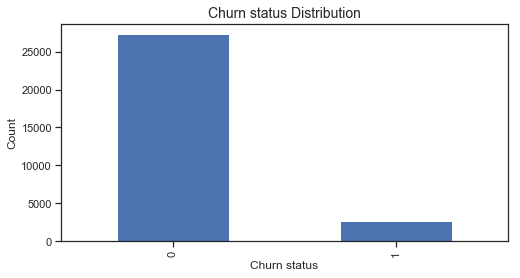

In [38]:
plt.figure(figsize=(8,4))
customer_dataframe_highval['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

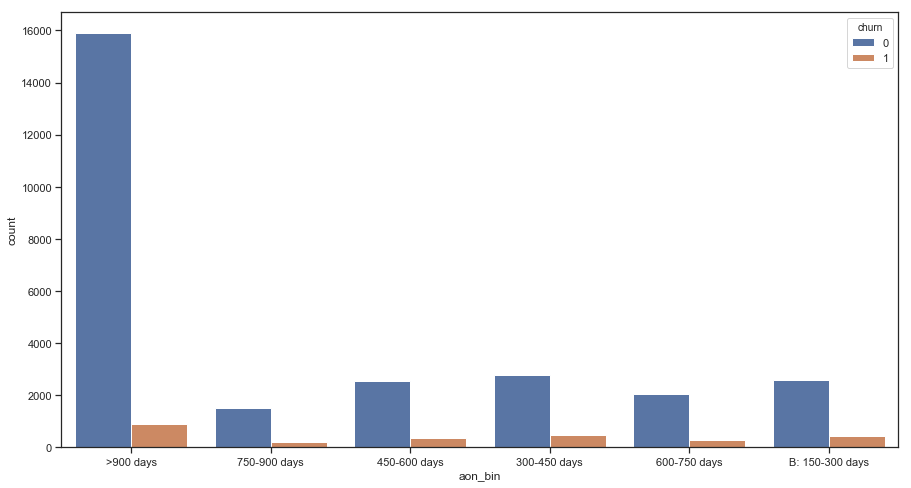

In [39]:
def aon_bin_duration(n):
    if n >=0 and n < 150:
        return 'A: 0-150 days'
    elif n >=150 and n < 300:
        return 'B: 150-300 days'
    elif n >=300 and n < 450:
        return '300-450 days'
    elif n >=450 and n < 600:
        return '450-600 days'
    elif n >=600 and n < 750:
        return '600-750 days'
    elif n >=750 and n < 900:
        return '750-900 days'
    elif n >=900:
        return '>900 days'

plt.figure(figsize = (15,8))
customer_dataframe_highval["aon_bin"] = customer_dataframe_highval["aon"].apply(lambda x: aon_bin_duration(x))
ax = sns.countplot(x="aon_bin", hue="churn", data=customer_dataframe_highval)

customer_dataframe_highval.drop('aon_bin',axis=1,inplace=True)

###### onnet_mou vs churn

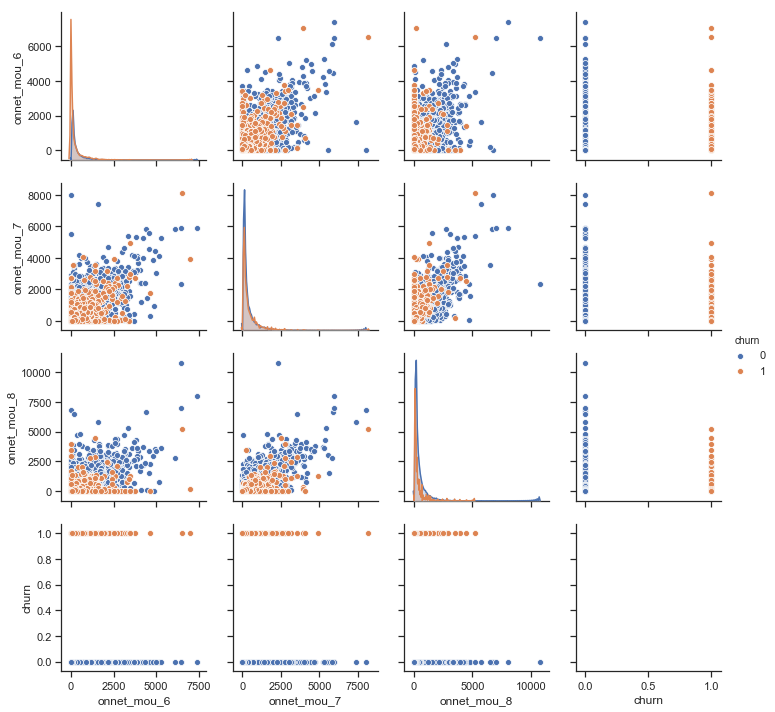

In [40]:
sns.pairplot(data = customer_dataframe_highval[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue ='churn')

###### roam_ic_mou vs churn

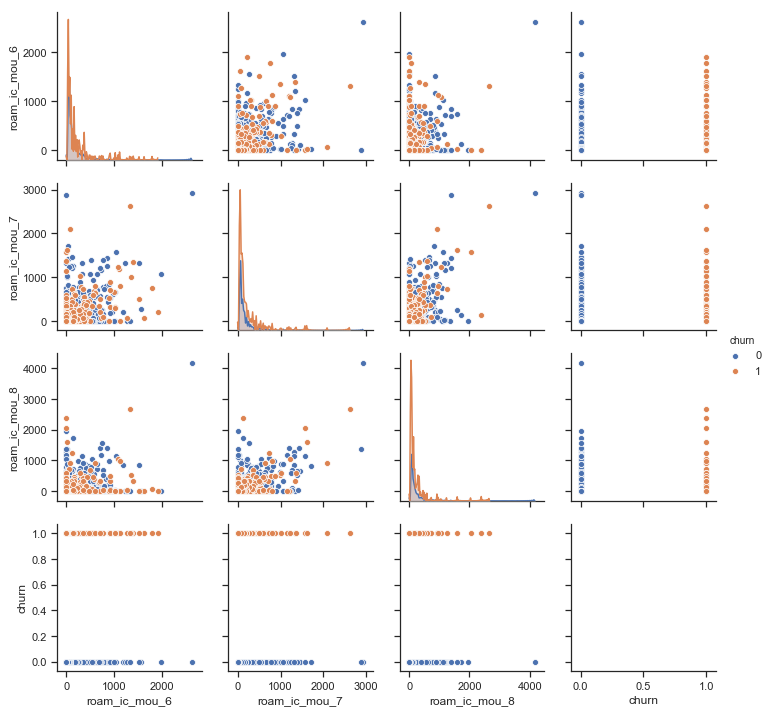

In [41]:
sns.pairplot(data = customer_dataframe_highval[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue ='churn')

###### std_og_mou vs churn

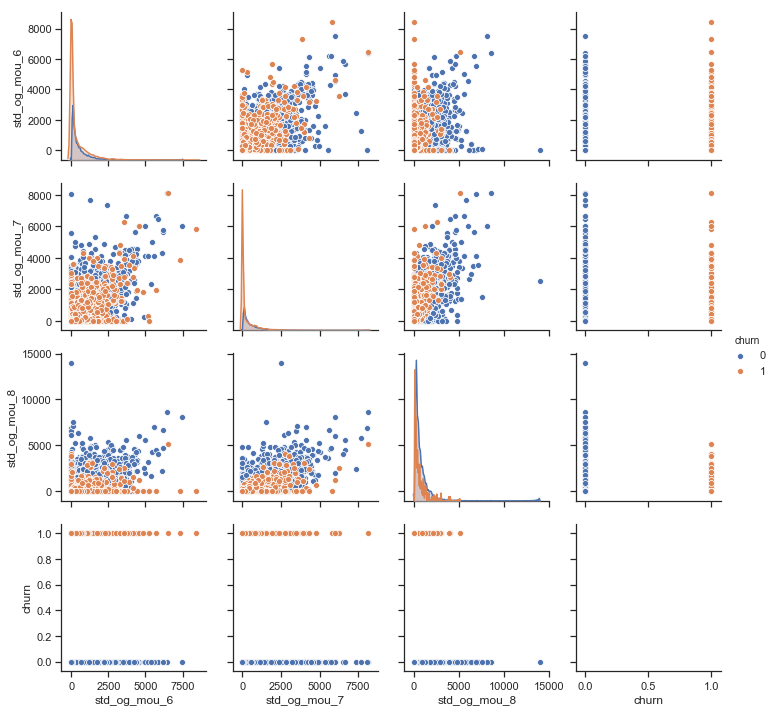

In [42]:
sns.pairplot(data = customer_dataframe_highval[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue ='churn')

###### total_og_ vs churn

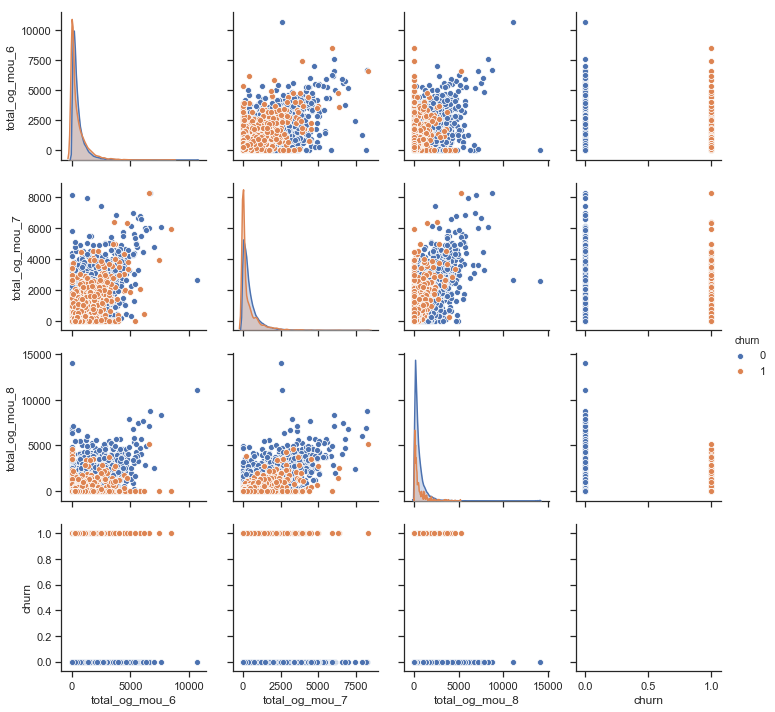

In [43]:
sns.pairplot(data = customer_dataframe_highval[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue = 'churn')

###### total_rech_amt_ vs churn

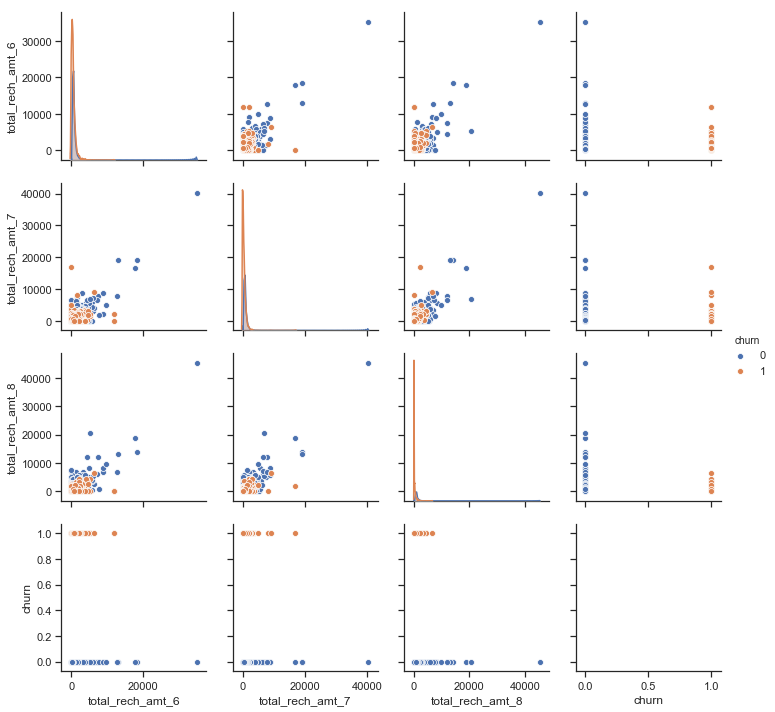

In [44]:
sns.pairplot(data = customer_dataframe_highval[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']],hue='churn')

###### total_rech_data_ vs churn

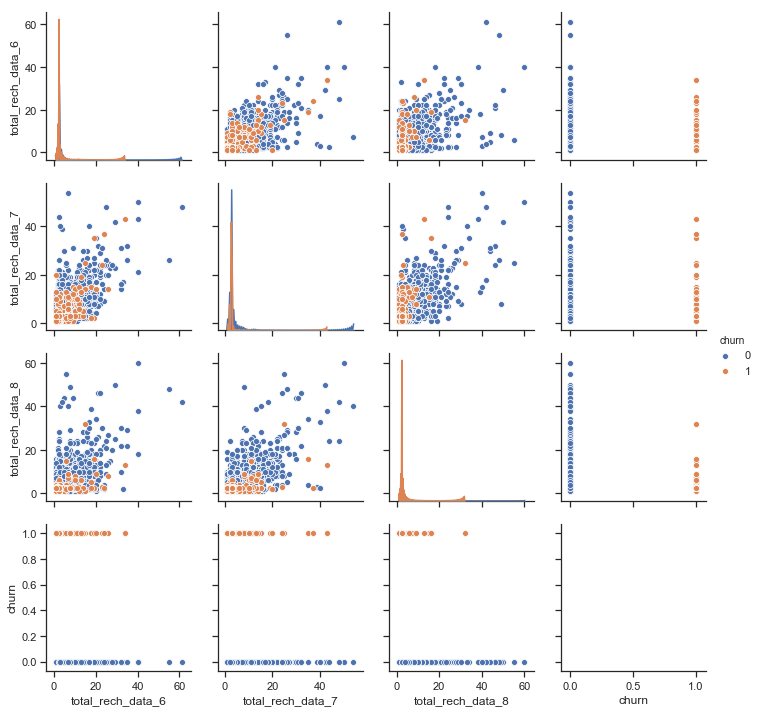

In [45]:
sns.pairplot(data = customer_dataframe_highval[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

#### Correlation for churn and non-churn customers

In [46]:
customer_dataframe_highval_churn = customer_dataframe_highval.loc[customer_dataframe_highval['churn'] == 1, :]
customer_dataframe_highval_nchurn = customer_dataframe_highval.loc[customer_dataframe_highval['churn'] == 0, :]
corr_churn = customer_dataframe_highval_churn.corr()
corr_nonchurn = customer_dataframe_highval_nchurn.corr()

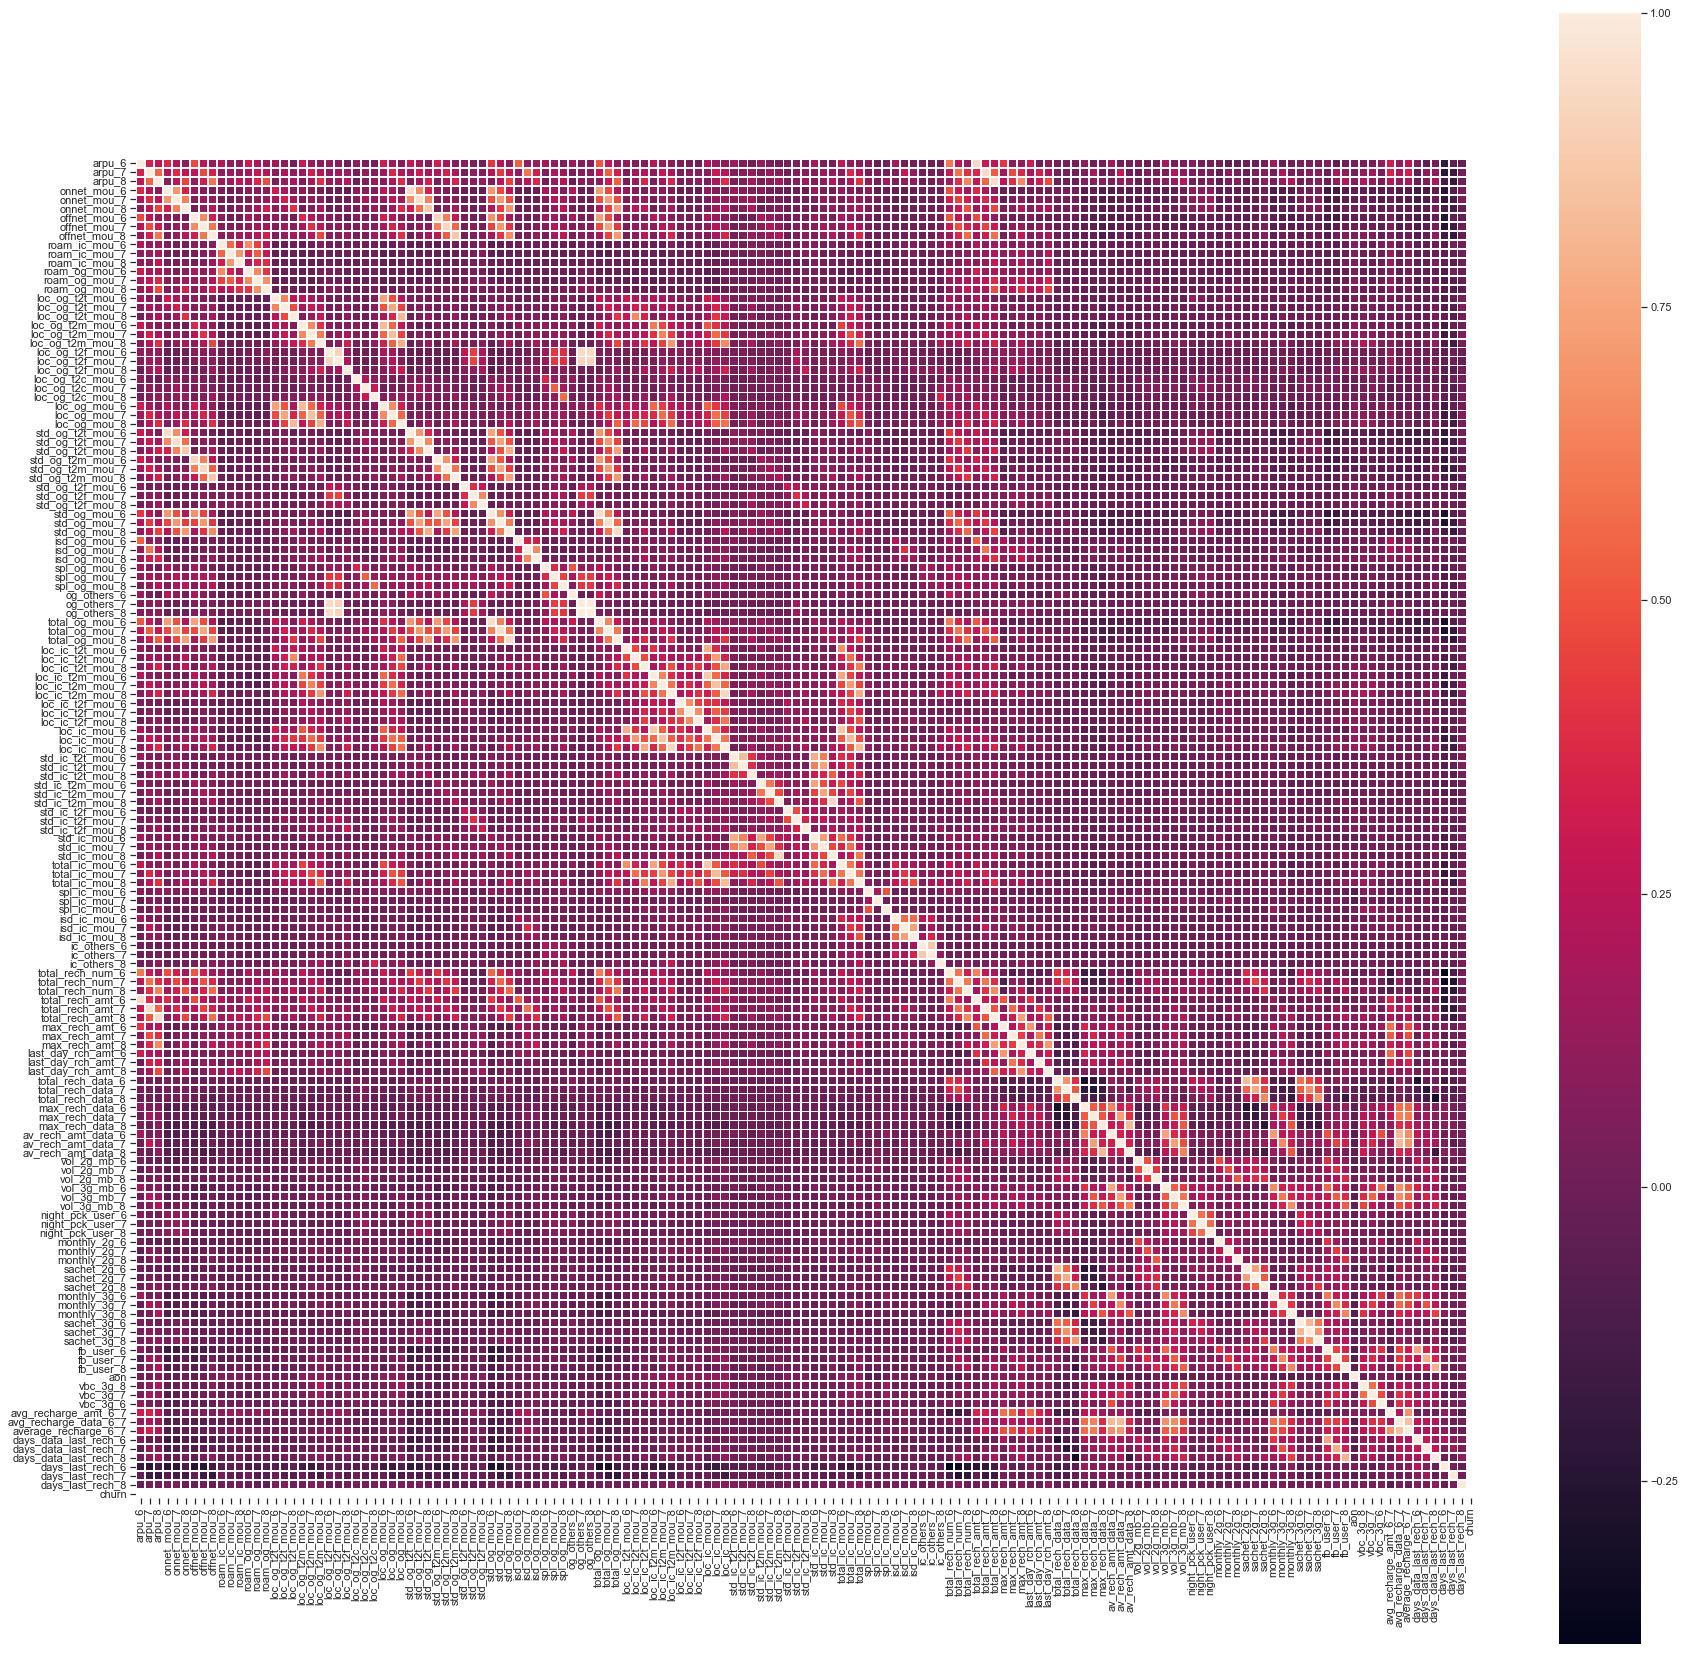

In [47]:
fig = plt.figure(figsize = (30.0, 30.0))
plot = sns.heatmap(corr_churn, xticklabels = True, yticklabels = True, square = True, linewidths = .9)
fig.add_axes(plot)

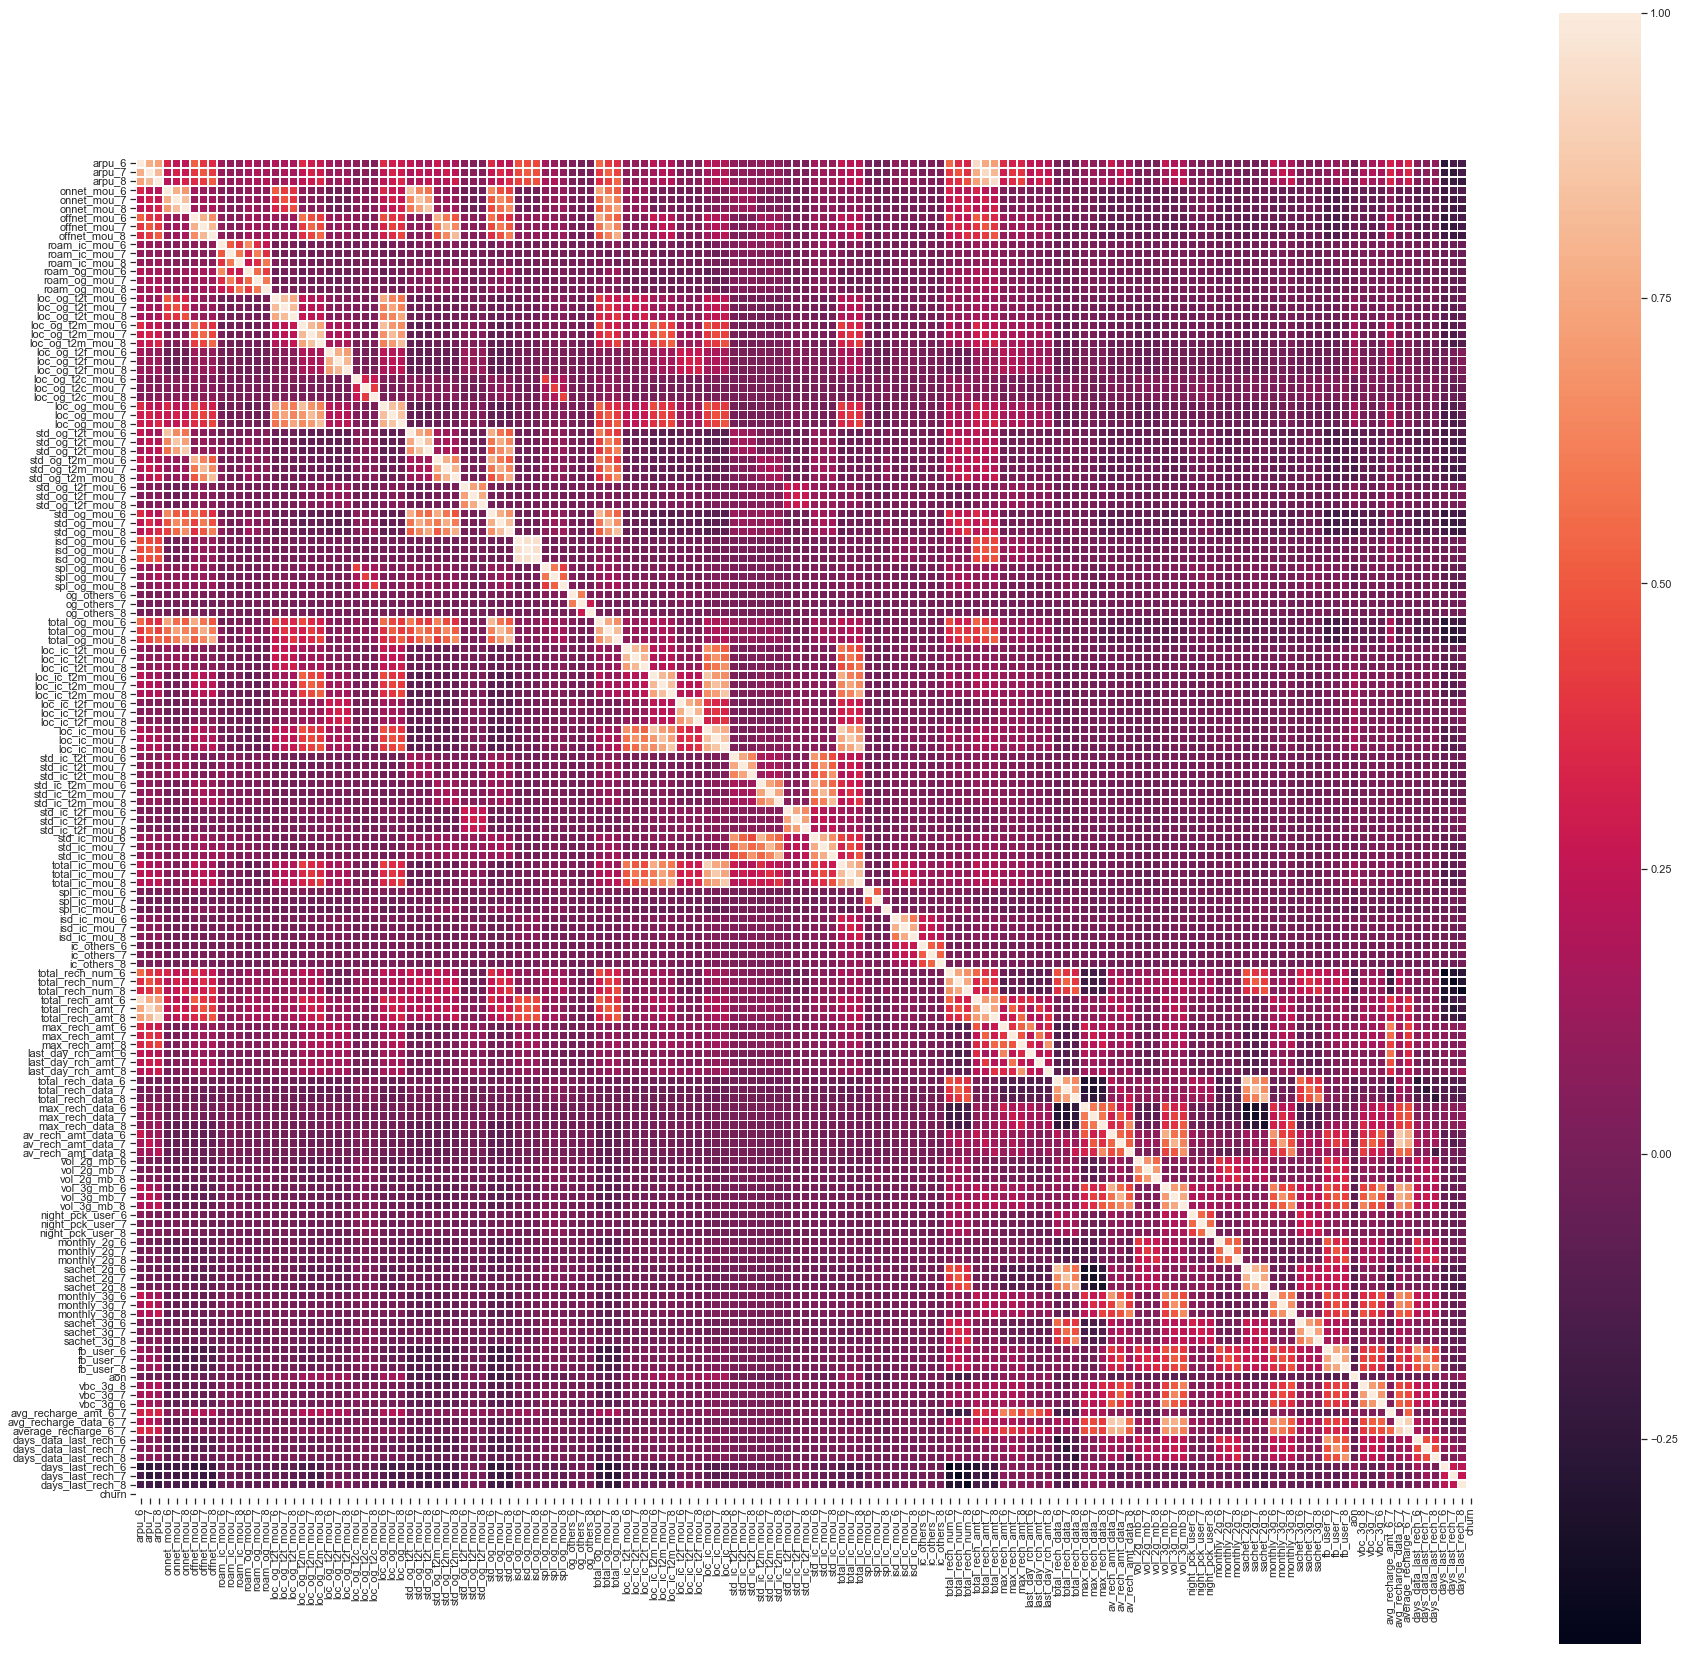

In [48]:
fig = plt.figure(figsize = (30.0, 30.0))
plot = sns.heatmap(corr_nonchurn, xticklabels = True, yticklabels = True, square = True, linewidths = .9)
fig.add_axes(plot)

In [49]:
# Month by month recharge trend

customer_dataframe_highval["6_7_rech_pct"] = ((customer_dataframe_highval.total_rech_amt_7 - customer_dataframe_highval.total_rech_amt_6).astype(float) * 100.0/ customer_dataframe_highval.total_rech_amt_6).replace(np.inf, 0)
customer_dataframe_highval["7_8_rech_pct"] = ((customer_dataframe_highval.total_rech_amt_8 - customer_dataframe_highval.total_rech_amt_7).astype(float) * 100.0/  customer_dataframe_highval.total_rech_amt_7).replace(np.inf, 0)

avg_decline67_churn = customer_dataframe_highval.groupby('churn')["6_7_rech_pct"].median()
avg_decline78_churn = customer_dataframe_highval.groupby('churn')["7_8_rech_pct"].median()

avg_decline = pd.concat([avg_decline67_churn, avg_decline78_churn], axis=1)
avg_decline.columns = ['%decline 6to7', '%decline 7to8']
print(avg_decline)

       %decline 6to7  %decline 7to8
churn                              
0           0.000000      -2.030509
1         -30.441483     -87.966817


###### Here we can see that a customer about to churn starts reducing the recharge

In [50]:
# Month by month recharge trend

customer_dataframe_highval["6_7_og_pct"] = ((customer_dataframe_highval.total_og_mou_7 - customer_dataframe_highval.total_og_mou_6).astype(float) * 100.0/ customer_dataframe_highval.total_og_mou_6).replace(np.inf, 0)
customer_dataframe_highval["7_8_og_pct"] = ((customer_dataframe_highval.total_og_mou_8 - customer_dataframe_highval.total_og_mou_7).astype(float) * 100.0/ customer_dataframe_highval.total_og_mou_7).replace(np.inf, 0)

avg_decline67_churn = customer_dataframe_highval.groupby('churn')["6_7_og_pct"].median()
avg_decline78_churn = customer_dataframe_highval.groupby('churn')["7_8_og_pct"].median()

avg_decline = pd.concat([avg_decline67_churn, avg_decline78_churn], axis=1)
avg_decline.columns = ['%decline 6to7', '%decline 7to8']
print(avg_decline)

       %decline 6to7  %decline 7to8
churn                              
0          -0.601947      -2.896995
1         -31.523802     -98.895268


In [51]:
# Dropping columns on which we performed analysis and they are of no use now

customer_dataframe_highval.drop(["6_7_og_pct", "7_8_og_pct", "6_7_rech_pct", "7_8_rech_pct"], axis = 1, inplace = True)

###### Here we can see that a customer about to churn starts reducing the outgoing calls

## Model Building

In [52]:
X = customer_dataframe_highval[customer_dataframe_highval.columns[~customer_dataframe_highval.columns.isin(['churn'])]]
Y = customer_dataframe_highval['churn']

#### Scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [54]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=111)

In [55]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (20960, 148)
Training dataset target size (20960,)
Test dataset size (8984, 148)
Test dataset target size (8984,)


## Performing PCA - Principal Compenent Analysis

In [56]:
# Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [57]:
# Doing the PCA on the train data

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [58]:
# Looking at PCA components

pca.components_

array([[ 1.76556324e-01,  1.87765937e-01,  1.86748085e-01, ...,
        -7.62043878e-02, -7.05259860e-02, -5.13581331e-02],
       [ 3.61596126e-02,  3.50183355e-02,  3.63568177e-02, ...,
         2.29993124e-02,  1.42479663e-02,  1.64311690e-02],
       [ 6.78743531e-02,  8.28210707e-02,  7.14620057e-02, ...,
        -4.81184518e-02, -4.96321704e-02, -5.62110507e-02],
       ...,
       [-3.81847773e-07,  5.02805691e-08, -9.75901772e-08, ...,
         3.46992551e-08,  2.37987855e-08, -1.06973451e-08],
       [-1.90372766e-16,  1.72533606e-16, -6.86837290e-17, ...,
         1.93010554e-17, -7.57465768e-17,  4.05862616e-17],
       [ 0.00000000e+00, -8.58508812e-17,  1.23955808e-16, ...,
        -1.33753314e-17,  6.33298704e-17, -3.42445294e-17]])

In [59]:
#Let's check the variance ratios

pca.explained_variance_ratio_

array([1.06811957e-01, 7.82370799e-02, 6.66988571e-02, 4.89095799e-02,
       3.95206613e-02, 3.57663785e-02, 2.96351478e-02, 2.73666686e-02,
       2.53789661e-02, 2.36509308e-02, 2.23670049e-02, 2.10526612e-02,
       1.96772049e-02, 1.83237583e-02, 1.69662011e-02, 1.59702946e-02,
       1.52591714e-02, 1.49091584e-02, 1.40196354e-02, 1.21424088e-02,
       1.18800748e-02, 1.15488571e-02, 1.05854683e-02, 1.04479482e-02,
       1.01514454e-02, 9.56273573e-03, 8.99437187e-03, 8.80603777e-03,
       8.56456718e-03, 7.86370800e-03, 7.49335411e-03, 7.38054662e-03,
       7.19617246e-03, 7.05013038e-03, 6.82797292e-03, 6.57297370e-03,
       6.53180785e-03, 6.45877737e-03, 6.35808267e-03, 5.91174119e-03,
       5.87357263e-03, 5.75788869e-03, 5.71917054e-03, 5.46664138e-03,
       5.25285186e-03, 5.05822827e-03, 4.86197276e-03, 4.77164167e-03,
       4.74438845e-03, 4.66360193e-03, 4.57132782e-03, 4.25378117e-03,
       4.19959098e-03, 4.02125114e-03, 3.83376331e-03, 3.76297168e-03,
      

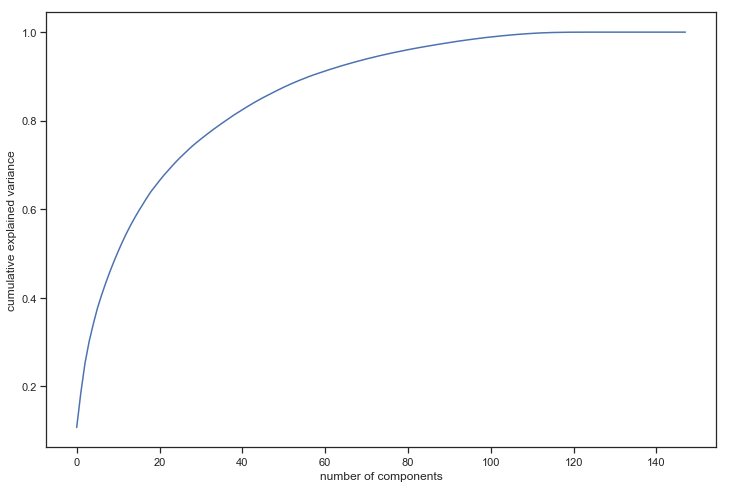

In [60]:
#Plotting the scree plot

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Scree plot indicates that we are able to explain 90% variance by using 80 Principal Components

In [61]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.176556,0.036160,arpu_6
1,0.187766,0.035018,arpu_7
2,0.186748,0.036357,arpu_8
3,0.103654,-0.098237,onnet_mou_6
4,0.115041,-0.108065,onnet_mou_7


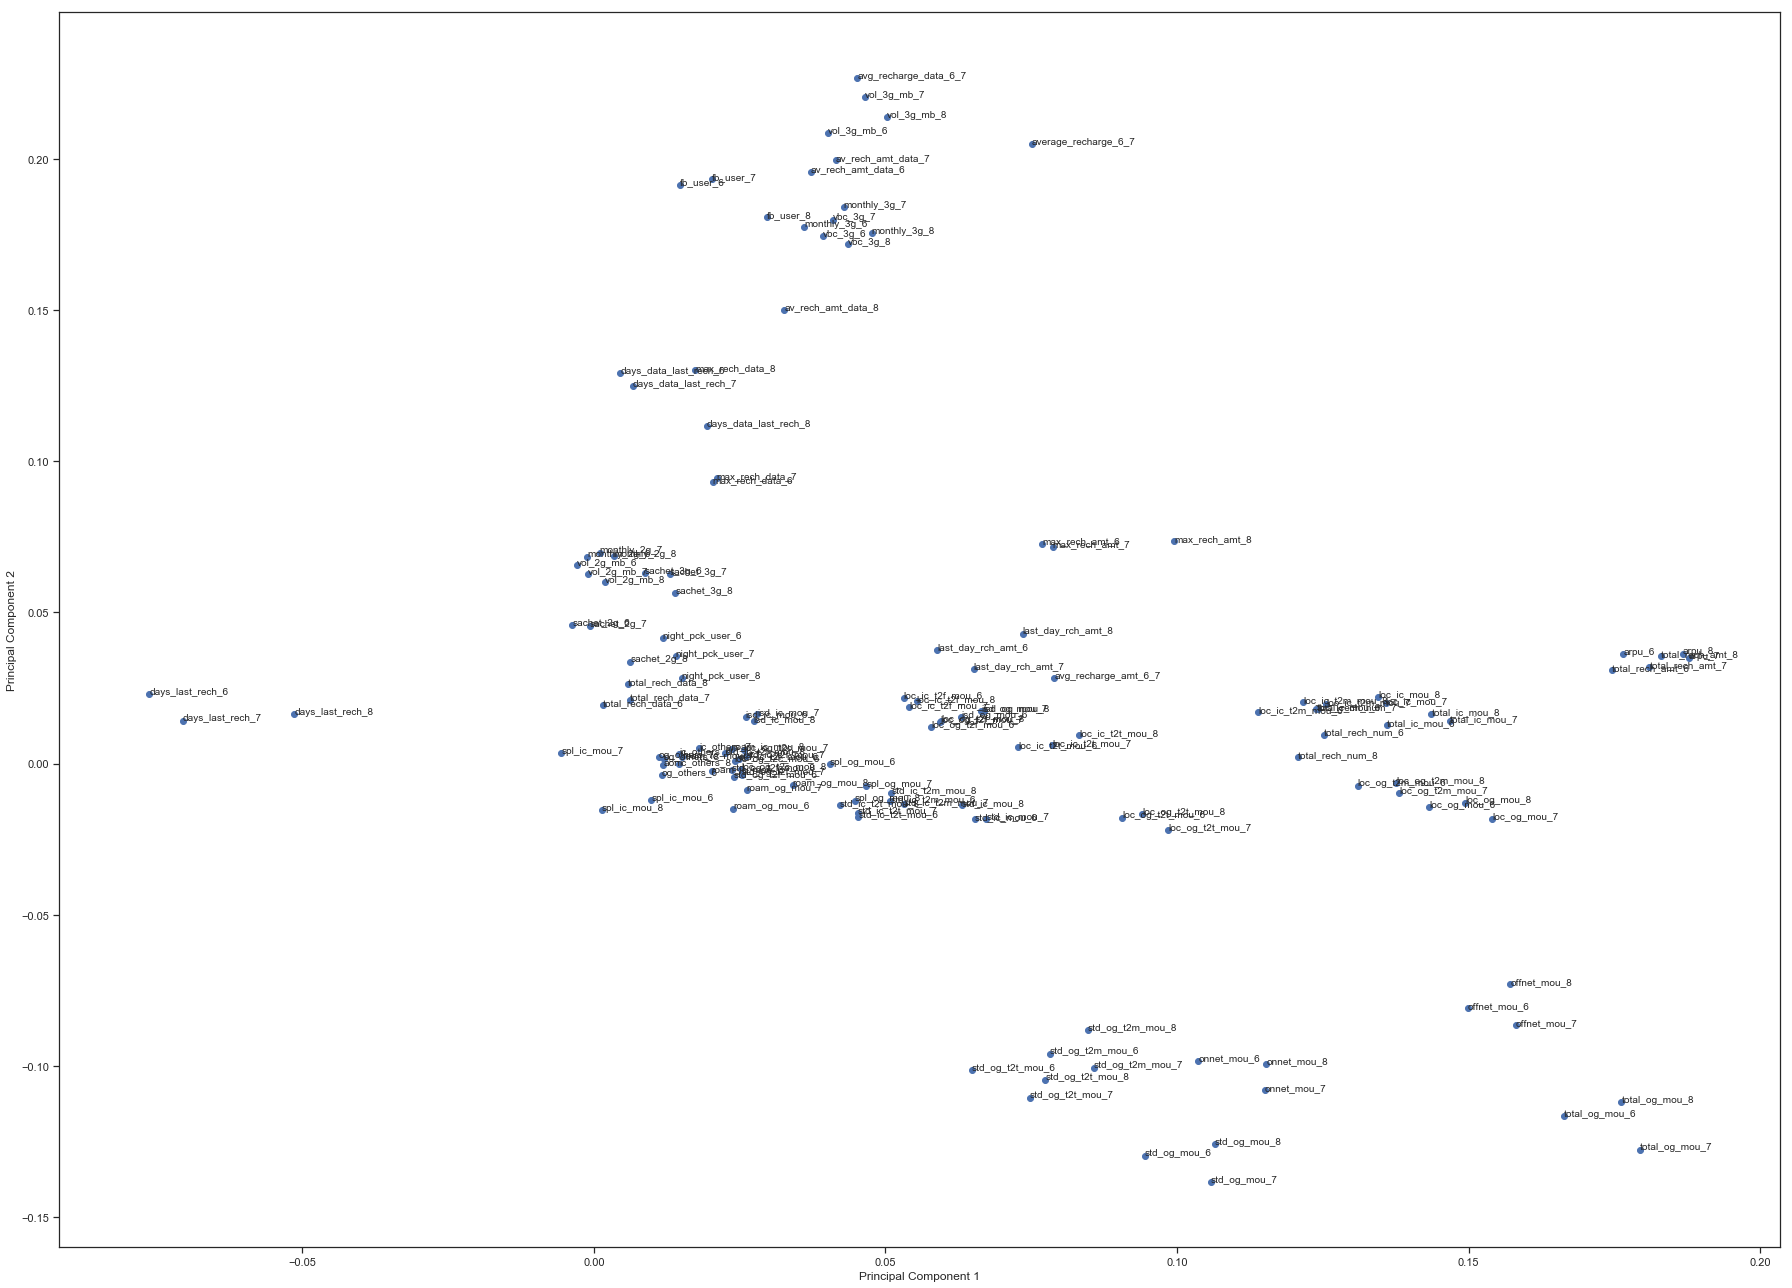

In [62]:
# Lets plot all the points of first and second Principal component

fig = plt.figure(figsize = (25,18))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()

In [63]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [10.7  7.8  6.7  4.9  4.   3.6  3.   2.7  2.5  2.4  2.2  2.1  2.   1.8
  1.7  1.6  1.5  1.5  1.4  1.2  1.2  1.2  1.1  1.   1.   1.   0.9  0.9
  0.9  0.8  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.6  0.6  0.6  0.6  0.6
  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4
  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]


In [64]:
# Getting cumulative sum of pc

print (pca.explained_variance_ratio_.cumsum())

[0.10681196 0.18504904 0.25174789 0.30065747 0.34017814 0.37594451
 0.40557966 0.43294633 0.4583253  0.48197623 0.50434323 0.52539589
 0.5450731  0.56339686 0.58036306 0.59633335 0.61159252 0.62650168
 0.64052132 0.65266373 0.6645438  0.67609266 0.68667813 0.69712607
 0.70727752 0.71684026 0.72583463 0.73464067 0.74320523 0.75106894
 0.75856229 0.76594284 0.77313901 0.78018914 0.78701712 0.79359009
 0.8001219  0.80658068 0.81293876 0.8188505  0.82472407 0.83048196
 0.83620113 0.84166777 0.84692062 0.85197885 0.85684083 0.86161247
 0.86635686 0.87102046 0.87559179 0.87984557 0.88404516 0.88806641
 0.89190017 0.89566314 0.89925262 0.90275075 0.90593236 0.90910218
 0.91224427 0.91530459 0.91828904 0.9211566  0.92399556 0.92675692
 0.92943738 0.93203236 0.93459273 0.9370741  0.93950724 0.94182378
 0.94408956 0.94634255 0.94850088 0.95064291 0.95265841 0.95463345
 0.95655476 0.95844769 0.96032339 0.9621139  0.96385204 0.96554766
 0.96719143 0.9688053  0.97038995 0.97195607 0.97348101 0.9749

In [65]:
# Using incremental PCA for efficiency

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54)

In [66]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20960, 54)

In [67]:
# Creating correlation matrix for the principal components

corr = np.corrcoef(df_train_pca.transpose())

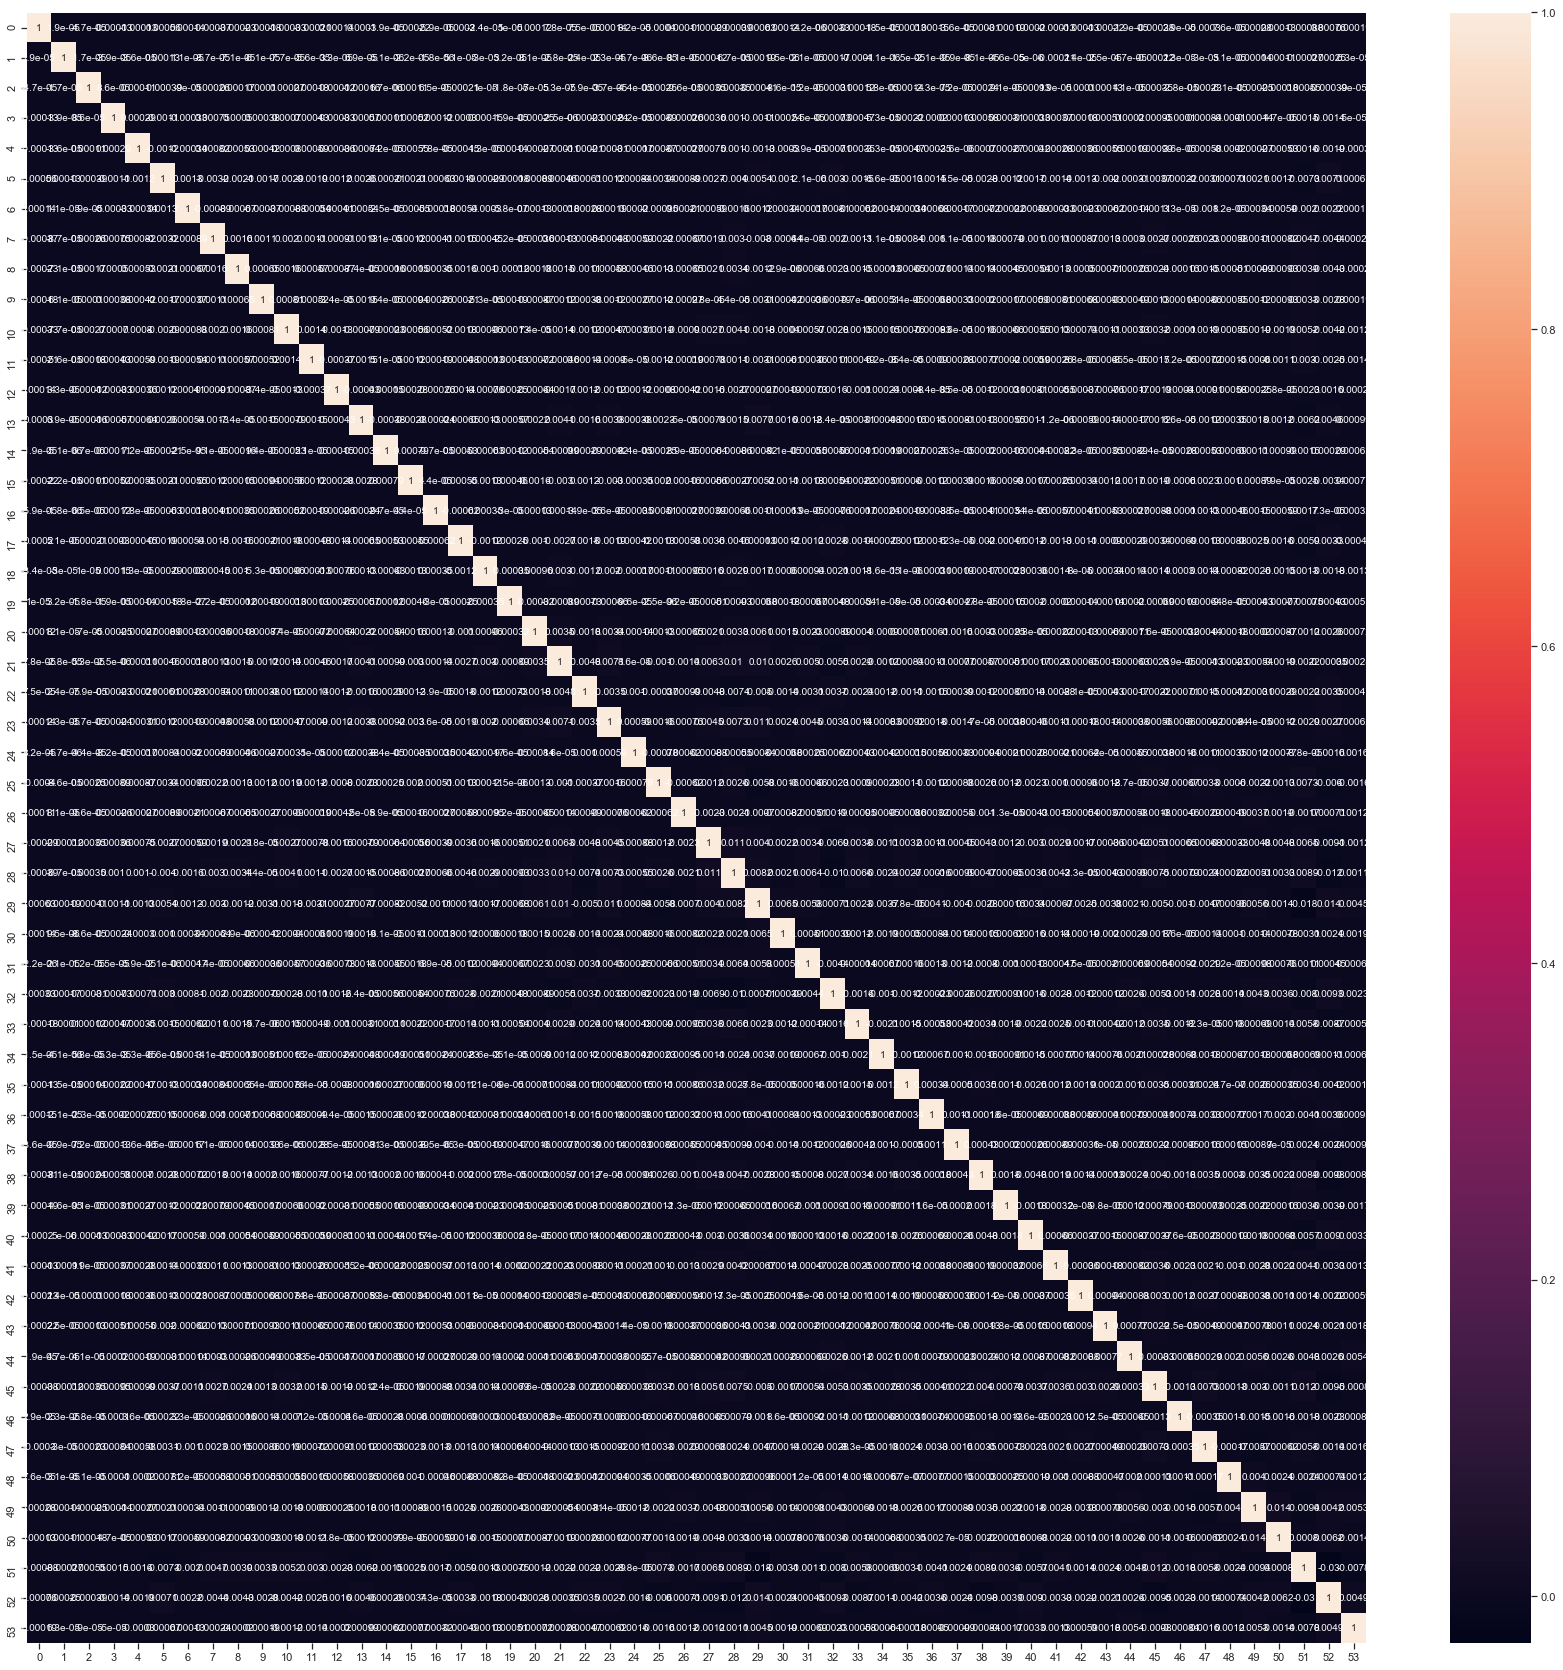

In [68]:
# Plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (30,30))
sns.heatmap(corr,annot = True)

In [69]:
corrmat_nodiag = corr - np.diagflat(corr.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.013934991020506226 , min corr:  -0.02956135441855161


In [70]:
# Applying selected components to the test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8984, 54)

### Logistic Regression on Principle components

In [71]:
# Training the model on the train data

from sklearn.linear_model import LogisticRegression

In [72]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

In [73]:
# Making prediction on the test data

pred_probs_test = model_pca.predict_proba(df_test_pca)[:, 1]
auc_roc = "{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

In [74]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test, columns = ['Churn_Prob'])

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]

# Let's see the head
y_pred_1.head()

,Churn_Prob
0,0.015307
1,0.000301
2,0.000930
3,0.172845
4,0.005375


In [75]:
# Converting the ytest to DF
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
10274,0
63559,0
81189,0
75808,0
40954,0


In [76]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,churn,Churn_Prob
0,0,0.015307
1,0,0.000301
2,0,0.000930
3,0,0.172845
4,0,0.005375


In [77]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0,0.015307,0
1,0,0.000301,0
2,0,0.000930,0
3,0,0.172845,0
4,0,0.005375,0


#### Overall accuracy is 89%

##### We will make more models with different components.

In [78]:
# Trying with 45 components

pca_last1 = PCA(n_components = 45)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(8984, 45)

In [79]:
# Training the model on the train data

learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)

# Making prediction on the test data

pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

'0.89'

In [80]:
# Trying with 20 components

pca_last1 = PCA(n_components = 20)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(8984, 20)

In [81]:
# Training the model on the train data

learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)

# Making prediction on the test data

pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

'0.84'

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    return fpr, tpr, thresholds

(array([0.        , 0.01052503, 1.        ]),
 array([0.       , 0.2201722, 1.       ]),
 array([2, 1, 0]))

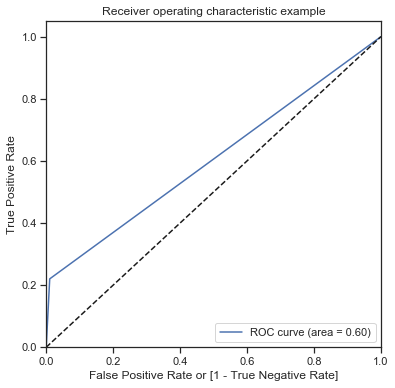

In [83]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [84]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015307,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000301,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000930,0,1,0,0,0,0,0,0,0,0,0
3,0,0.172845,0,1,1,0,0,0,0,0,0,0,0
4,0,0.005375,0,1,0,0,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
min_prod  = 1.0
optimum_prob = 0.0 
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1]).astype(float)/total1
    sensi = cm1[0,0].astype(float) /(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1].astype(float) /(cm1[1,0]+cm1[1,1])
    prod = abs((accuracy - sensi) * (accuracy - speci ) * (speci - sensi))
    if min_prod > prod:
        optimum_prob = i
        min_prod = prod
        
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
print(optimum_prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.090494  0.000000  1.000000
0.1   0.1  0.812890  0.811406  0.827798
0.2   0.2  0.898041  0.915800  0.719557
0.3   0.3  0.922863  0.954351  0.606396
0.4   0.4  0.924087  0.976747  0.394834
0.5   0.5  0.919858  0.989475  0.220172
0.6   0.6  0.917743  0.996328  0.127921
0.7   0.7  0.914515  0.998287  0.072571
0.8   0.8  0.912177  0.999021  0.039360
0.9   0.9  0.910285  0.999388  0.014760
0.1


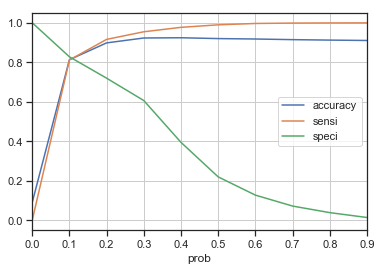

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(True)

In [87]:
print("Threshold for classification is")
print(optimum_prob)

Threshold for classification is
0.1


In [88]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > optimum_prob else 0)

In [89]:
# Let's calculate other scores and print them
conf_matrix = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )

total1=sum(sum(conf_matrix))
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]).astype(float)/total1
sensi = conf_matrix[0,0].astype(float) /(conf_matrix[0,0]+conf_matrix[0,1])
speci = conf_matrix[1,1].astype(float) /(conf_matrix[1,0]+conf_matrix[1,1])
print("ACCURACY: ", accuracy)
print("SENSITIVITY: ", sensi)
print("SPECIFICITY: ", speci)

ACCURACY:  0.8128895814781835
SENSITIVITY:  0.8114061926324807
SPECIFICITY:  0.8277982779827798


In [90]:
LR_PCA_perf = ['LogisticRegression', accuracy, sensi, speci, auc_roc]

### Random forest - Principle components

In [91]:
# Define x train and y train and x test and y test
X_rf_train = df_train_pca 
X_rf_test  = df_test_pca
y_rf_train = y_train
y_rf_test  = y_test

In [92]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_rf_train,y_rf_train)

predictions = rfc.predict(X_rf_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8171
           1       0.73      0.24      0.36       813

    accuracy                           0.92      8984
   macro avg       0.83      0.62      0.66      8984
weighted avg       0.91      0.92      0.91      8984



In [93]:
# Confusion matrix for default random forest

conf_matrix = confusion_matrix(y_rf_test,predictions)
print(conf_matrix)

[[8098   73]
 [ 616  197]]


In [94]:
# Let's calculate other scores and print them

total1=sum(sum(conf_matrix))
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]).astype(float)/total1
sensi = conf_matrix[0,0].astype(float) /(conf_matrix[0,0]+conf_matrix[0,1])
speci = conf_matrix[1,1].astype(float) /(conf_matrix[1,0]+conf_matrix[1,1])
print("ACCURACY: ", accuracy)
print("SENSITIVITY: ", sensi)
print("SPECIFICITY: ", speci)

ACCURACY:  0.9233081032947462
SENSITIVITY:  0.9910659649981642
SPECIFICITY:  0.24231242312423124


##### Low Specificity => High Bias and High False-Positives
We need to improve by tuning hyper parameters

#### By tuning maximum depth

In [95]:
n_folds = 5
parameters = {'max_depth': range(2, 20, 4)}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, return_train_score = True, scoring = "accuracy")
rf.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [96]:
# Score of GridSearch
scores = rf.cv_results_
scores_df = pd.DataFrame(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.191388,0.009411,0.004505,0.000528,2,{'max_depth': 2},0.913427,0.913427,0.913406,0.913624,...,0.913502,0.000100,5,0.913521,0.913521,0.913526,0.913471,0.913471,0.913502,0.000025
1,0.466299,0.008408,0.004948,0.000234,6,{'max_depth': 6},0.917005,0.917005,0.916269,0.914340,...,0.916412,0.001102,4,0.923302,0.920856,0.920026,0.915499,0.919554,0.919847,0.002529
2,0.742270,0.042086,0.006685,0.001238,10,{'max_depth': 10},0.918674,0.922728,0.928435,0.925078,...,0.924332,0.003401,1,0.954673,0.955985,0.955510,0.953068,0.955394,0.954926,0.001020
3,0.834787,0.027811,0.006468,0.000065,14,{'max_depth': 14},0.919628,0.923205,0.926527,0.920544,...,0.923044,0.002655,2,0.981631,0.981869,0.984494,0.984137,0.980321,0.982490,0.001585
4,1.005109,0.139205,0.007031,0.000375,18,{'max_depth': 18},0.920343,0.924159,0.922471,0.920305,...,0.922471,0.001942,3,0.992426,0.991352,0.992009,0.992248,0.991055,0.991818,0.000527


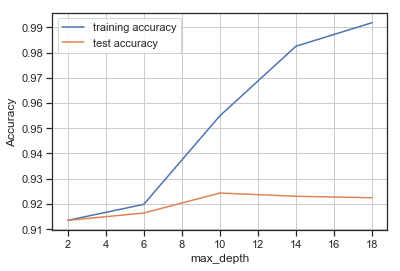

In [97]:
# Now we plot the accuracy with "max_depth"
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

##### Accuracy is maximum near about max depth of 18. While the increase in accuracy slows down near 14. So lets keep the max depth as 14

In [98]:
n_folds = 5
parameters = {'n_estimators': range(1, 20, 4)}

# Provide max_depth to the initializer
rf = RandomForestClassifier(max_depth = 14)
rf = GridSearchCV(rf, parameters, cv=n_folds, return_train_score = True, scoring="accuracy")
rf.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=14,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [99]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.091474,0.006225,0.002156,0.000503,1,{'n_estimators': 1},0.876938,0.884331,0.900048,0.882128,...,0.886212,0.007741,5,0.949663,0.949842,0.949785,0.949908,0.946628,0.949165,0.001271
1,0.429990,0.015893,0.004031,0.000189,5,{'n_estimators': 5},0.916766,0.917720,0.917939,0.919351,...,0.918607,0.001563,4,0.975428,0.978231,0.978709,0.974536,0.975848,0.976551,0.001631
2,0.752316,0.015526,0.006174,0.000410,9,{'n_estimators': 9},0.922490,0.921536,0.923664,0.922453,...,0.923855,0.002724,1,0.979603,0.980140,0.982288,0.980559,0.981215,0.980761,0.000928
3,1.087399,0.016109,0.007857,0.000072,13,{'n_estimators': 13},0.923205,0.926783,0.924141,0.921021,...,0.923760,0.001850,2,0.981213,0.983837,0.984256,0.979426,0.980679,0.981882,0.001865
4,1.409102,0.022265,0.009838,0.000087,17,{'n_estimators': 17},0.923205,0.920582,0.923903,0.921021,...,0.922901,0.001917,3,0.984434,0.984255,0.986224,0.982587,0.981156,0.983731,0.001728


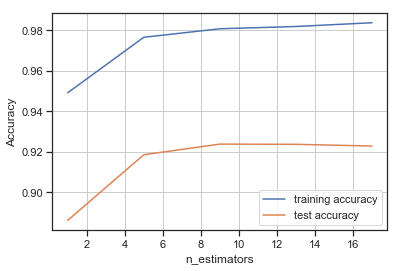

In [100]:
# Now we plot the accuracy with "n_estimators"
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

##### Accuracy is maximum near about estimators count of 12

In [101]:
n_folds = 5
parameters = {'max_features': [4, 8, 12, 16, 20, 24]}

# Provide max_depth to the initializer
rf = RandomForestClassifier(max_depth = 14)
rf = GridSearchCV(rf, parameters, cv=n_folds, return_train_score = True, scoring="accuracy")
rf.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=14,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [102]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.485582,0.010386,0.006687,0.000048,4,{'max_features': 4},0.917959,0.922251,0.923187,0.917681,...,0.921279,0.002995,6,0.977336,0.977158,0.980260,0.979486,0.976683,0.978185,0.001416
1,0.946951,0.008408,0.006675,0.000317,8,{'max_features': 8},0.922013,0.923682,0.923187,0.921976,...,0.923664,0.002012,2,0.982943,0.983002,0.981572,0.981394,0.983362,0.982455,0.000808
2,1.537740,0.103106,0.006395,0.000288,12,{'max_features': 12},0.918674,0.925113,0.920802,0.921021,...,0.921756,0.002201,5,0.982167,0.982585,0.984256,0.982587,0.982289,0.982777,0.000758
3,2.009534,0.048236,0.006904,0.000846,16,{'max_features': 16},0.921536,0.923205,0.925573,0.928657,...,0.924857,0.002405,1,0.982883,0.984970,0.983123,0.983362,0.983541,0.983576,0.000732
4,2.512344,0.110120,0.006489,0.000192,20,{'max_features': 20},0.917005,0.925113,0.923187,0.924123,...,0.923282,0.003382,3,0.982406,0.982287,0.985448,0.983064,0.983004,0.983242,0.001146


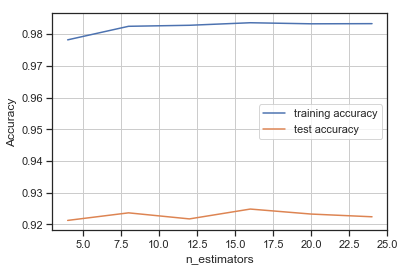

In [103]:
# Now we plot the accuracy with "max_features"
plt.figure()
plt.plot(scores["param_max_features"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_features"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

##### Accuracy is maximum near about max_features count of 22

In [104]:
n_folds = 5
parameters = {'min_samples_leaf': range(10, 500, 50)}

# Provide max_depth to the initializer
rf = RandomForestClassifier(max_depth = 14)
rf = GridSearchCV(rf, parameters, cv=n_folds, return_train_score = True, scoring="accuracy")
rf.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=14,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [105]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.777399,0.028907,0.006335,0.000265,10,{'min_samples_leaf': 10},0.919151,0.922251,0.922471,0.921021,...,0.921947,0.001866,1,0.944057,0.942864,0.947102,0.945972,0.944302,0.944859,0.001497
1,0.646297,0.046485,0.005558,0.000055,60,{'min_samples_leaf': 60},0.916766,0.917720,0.922710,0.918397,...,0.919227,0.002139,2,0.922407,0.920618,0.921100,0.921104,0.921820,0.921410,0.000629
2,0.562758,0.044520,0.005598,0.000647,110,{'min_samples_leaf': 110},0.915335,0.917482,0.916269,0.915772,...,0.916698,0.001205,3,0.917695,0.918053,0.916925,0.918958,0.919435,0.918213,0.000894
3,0.487657,0.013955,0.005498,0.000457,160,{'min_samples_leaf': 160},0.915812,0.914858,0.916746,0.915056,...,0.915219,0.001038,4,0.916682,0.914952,0.916865,0.916751,0.913471,0.915744,0.001337
4,0.460721,0.010505,0.005383,0.000439,210,{'min_samples_leaf': 210},0.913666,0.916051,0.914122,0.914340,...,0.914361,0.000888,5,0.913938,0.916682,0.914719,0.915439,0.913471,0.914850,0.001136


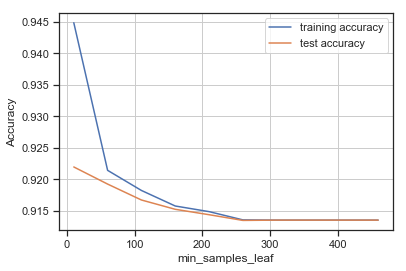

In [106]:
# Now we plot the accuracy with "max_features"
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

##### Accuracy is maximum near about min_samples_leaf count of 10

### We will model with parameters obtained till now

In [107]:
rfc = RandomForestClassifier(bootstrap = True,
                             max_depth = 14,
                             max_features = 22,
                             min_samples_leaf = 10,
                             n_estimators = 12)

In [108]:
TrainedRFC = rfc.fit(X_rf_train,y_rf_train)

In [109]:
predictions = rfc.predict(X_rf_test)

In [110]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8171
           1       0.72      0.28      0.40       813

    accuracy                           0.93      8984
   macro avg       0.83      0.63      0.68      8984
weighted avg       0.91      0.93      0.91      8984



In [111]:
# Confusion matrix for default random forest

conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[8084   87]
 [ 586  227]]


In [112]:
# Let's calculate other scores and print them

total1=sum(sum(conf_matrix))
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]).astype(float)/total1
sensi = conf_matrix[0,0].astype(float) /(conf_matrix[0,0]+conf_matrix[0,1])
speci = conf_matrix[1,1].astype(float) /(conf_matrix[1,0]+conf_matrix[1,1])
print("ACCURACY: ", accuracy)
print("SENSITIVITY: ", sensi)
print("SPECIFICITY: ", speci)

ACCURACY:  0.9250890471950134
SENSITIVITY:  0.9893525884224698
SPECIFICITY:  0.27921279212792127


In [113]:
# Adding roc_auc score
auc_roc = "{:2.2}".format(metrics.roc_auc_score(y_test, predictions))
print(auc_roc)

0.63


In [114]:
#add roc_auc score
RF_PCA_perf = ['RandomForest', accuracy, sensi, speci, auc_roc]

### So we can colnclude that Random Forest gives better accuracy and low specificity, but Logistic Regression gives high specificity and low accuracy.

#### We will go with random forest model to identify most importanat features

In [118]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'col_imp','col_name'})
sorted_feature_importance.head(10)

,col_name,col_imp
0,0.213225,arpu_6
1,0.117157,roam_og_mou_8
2,0.059102,roam_og_mou_7
3,0.034552,onnet_mou_6
4,0.031011,loc_og_t2f_mou_7
5,0.026280,arpu_8
6,0.025902,loc_og_t2f_mou_8
7,0.019201,roam_ic_mou_6
8,0.018742,offnet_mou_6
9,0.018562,arpu_7


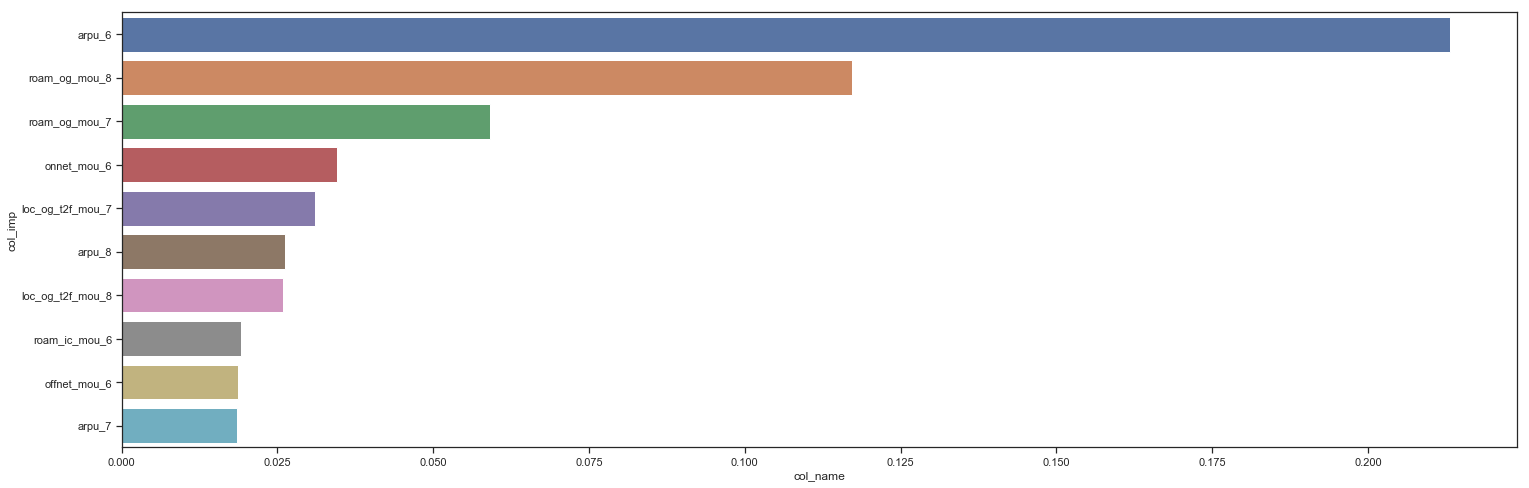

In [119]:
plt.figure(figsize = (25,8))
ax = sns.barplot(x="col_name", y="col_imp", data=sorted_feature_importance.head(10))

## Recommendations to Business 

- From the above we can clearly infer that "Average revenue per user" is key for identifying churn customers
- Other most important factor to consider is "Minutes of usage - voice calls - Roaming"
- Especially the "minutes of usage of all kind of calls within the same operator network"
- The other key factor is if the "Local calls - within same telecom circle - Operator T to fixed lines of T" shows a dip in the action phase, it is sign of churn
- "All kind of calls outside the operator T network" is also a key indicator
- During EDA phase, we also determined that age on network is also a key indicator for identifying the churn, if aon is less than 450 days and their usage is reduce then the customer is going to be churned